# 0816050 施雅青

#  READ DATA FOR IRIS

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

attribute_i = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data = pd.read_csv('iris.data', names = attribute_i)
# print(data)

## CALCULATE MEAN AND STANDARD AND DRAW PICTURES

In [58]:
# if your seaborn has no attribute histplot, please run this command below
# ! pip install --upgrade seaborn

For IRIS

          sepal length  sepal width  petal length  pedal width
averge        5.843333     3.054000      3.758667     1.198667
standard      0.825301     0.432147      1.758529     0.760613

For Iris-setosa

          sepal length  sepal width  petal length  petal width
averge         5.00600     3.418000      1.464000      0.24400
standard       0.35249     0.381024      0.173511      0.10721

For Iris-versicolor

          sepal length  sepal width  petal length  petal width
averge        5.936000     2.770000      4.260000     1.326000
standard      0.516171     0.313798      0.469911     0.197753

For Iris-virginica

          sepal length  sepal width  petal length  petal width
averge         6.58800     2.974000      5.552000      2.02600
standard       0.63588     0.322497      0.551895      0.27465


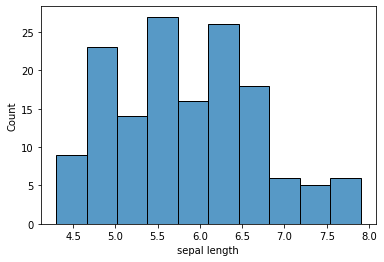

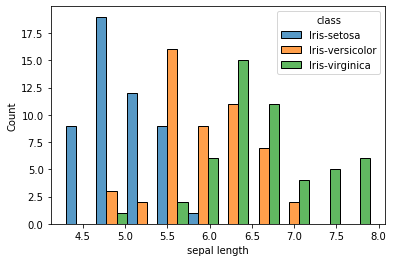

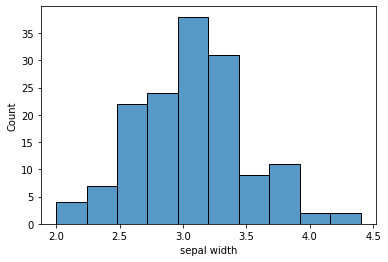

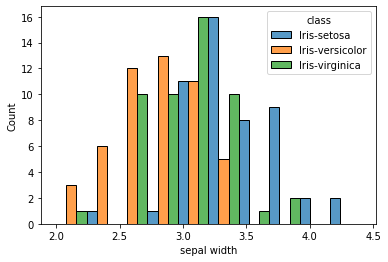

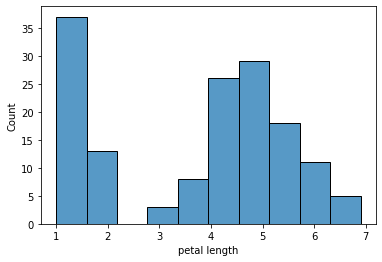

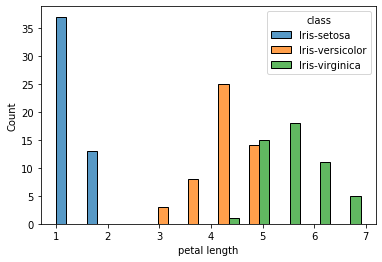

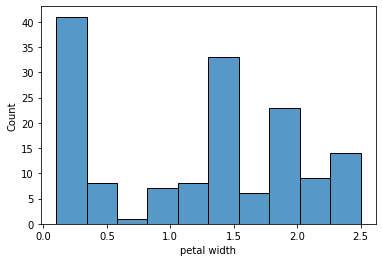

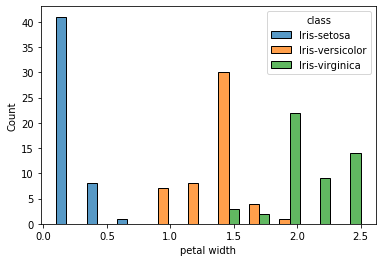

In [59]:
# data.describe()
# x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# x
# data.describe()[['mean']]
sepal_length = data['sepal length'].to_numpy()
sepal_width = data['sepal width'].to_numpy()
petal_length = data['petal length'].to_numpy()
petal_width = data['petal width'].to_numpy()
# print(sepal_length.shape)

print('\033[34mFor IRIS\033[0m\n')
data_describe = {
    'sepal length': [np.mean(sepal_length),np.std(sepal_length)],
    'sepal width' : [np.mean(sepal_width),np.std(sepal_width)],
    'petal length' : [np.mean(petal_length),np.std(petal_length)],
    'pedal width' : [np.mean(petal_width),np.std(petal_width)],
}

print(pd.DataFrame(data_describe, index = ['averge', 'standard']))


## classify by their group to draw a picture
iris_group = data.groupby('class')
iris_setosa = iris_group.get_group('Iris-setosa')
iris_versicolor = iris_group.get_group('Iris-versicolor')
iris_virginica = iris_group.get_group('Iris-virginica')

'''calculate mean and standard''' 

print('\033[34m\nFor Iris-setosa\033[0m\n')
iris_set_data = {
    'sepal length': [iris_setosa['sepal length'].mean(), iris_setosa['sepal length'].std()],
    'sepal width' : [iris_setosa['sepal width'].mean(), iris_setosa['sepal width'].std()],
    'petal length' : [iris_setosa['petal length'].mean(), iris_setosa['petal length'].std()],
    'petal width' : [iris_setosa['petal width'].mean(), iris_setosa['petal width'].std()],
}

print(pd.DataFrame(iris_set_data, index = ['averge', 'standard']))

print('\033[34m\nFor Iris-versicolor\033[0m\n')
iris_ver_data = {
    'sepal length': [iris_versicolor['sepal length'].mean(), iris_versicolor['sepal length'].std()],
    'sepal width' : [iris_versicolor['sepal width'].mean(), iris_versicolor['sepal width'].std()],
    'petal length' : [iris_versicolor['petal length'].mean(), iris_versicolor['petal length'].std()],
    'petal width' : [iris_versicolor['petal width'].mean(), iris_versicolor['petal width'].std()],
}

print(pd.DataFrame(iris_ver_data, index = ['averge', 'standard']))

print('\033[34m\nFor Iris-virginica\033[0m\n')
iris_vir_data = {
    'sepal length': [iris_virginica['sepal length'].mean(), iris_virginica['sepal length'].std()],
    'sepal width' : [iris_virginica['sepal width'].mean(), iris_virginica['sepal width'].std()],
    'petal length' : [iris_virginica['petal length'].mean(), iris_virginica['petal length'].std()],
    'petal width' : [iris_virginica['petal width'].mean(), iris_virginica['petal width'].std()],
}

print(pd.DataFrame(iris_vir_data, index = ['averge', 'standard']))

'''draw picture''' 
iris_feature_data = data.drop(['class'],axis = 1)
# print(iris_feature_data.shape)

iris_feature = ['sepal length','sepal width','petal length','petal width']
# iris_feature = iris_feature.to_numpy()
for i in iris_feature[0:4]:
    sns.histplot(data=data, x=iris_feature_data[i],bins=10)
    plt.show()
    sns.histplot(data=data, x=iris_feature_data[i],bins=10,hue="class",multiple="dodge")
    plt.show()


## SHUFFLE AND SPLIT DATA

In [60]:
df=data.sample(frac=1).reset_index(drop=True) # shuffle
# print(df.shape)

y = df['class']
# print(y.shape)
X = df.drop(['class'],axis = 1)
# print(X.shape)
X.isnull().sum()

# print(type(X))
# print(type(y))


sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

## HOLDOUT

In [61]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [62]:
# construct model and predict
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [63]:
# calculate confusion matrix
def cal_confusion_matrix(y_test, y_pred):
    y_test = y_test.tolist()
    
    
    fp = 0
    fn = 0
    tp = 0
    tn = 0
    
    for actual_value, predicted_result in zip(y_test, y_pred):
    # let's first see if it's a true (t) or false prediction (f)
        if predicted_result == actual_value: # t?
            if predicted_result == 1: # tp
                tp += 1
            else: # tn
                tn += 1
        else: # f?
            if predicted_result == 1: # fp
                fp += 1
            else: # fn
                fn += 1
    data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

    df_con = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix_nok = pd.crosstab(df_con['y_Actual'], df_con['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
      
            
    return fp, fn, tp, tn, confusion_matrix_nok

In [64]:
# function to calculate precision, recall, accuracy
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def cal_accuracy(fp, fn, tp, tn):
    return (tn+tp)/float(tn+tp+fn+fp)

In [65]:
print("holdout")
print("accuracy: ", end=' ')
print(metrics.accuracy_score(y_test,y_pred))
print('\n')

fp, fn, tp, tn, confusion_matrix_nok = cal_confusion_matrix(y_test,y_pred)
print(confusion_matrix_nok)
print('\n')

# calculate precision, recall by label
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
print('{:20s} {:9s}  {:6s}'.format('label', 'precision', 'recall'))
# for label in classes:
for label in range(3):
    print(f"{classes[label]:20s} {precision(label, confusion_matrix):9.3f} {recall(label, confusion_matrix):6.3f}")


holdout
accuracy:  0.9333333333333333


Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               15                0               0
Iris-versicolor            0               16               1
Iris-virginica             0                2              11


label                precision  recall
Iris-setosa              1.000  1.000
Iris-versicolor          0.889  0.941
Iris-virginica           0.917  0.846


## SHUFFLE FOR K-FOLD

In [66]:
df2=data.sample(frac=1).reset_index(drop=True)
y2 = df2['class']
X2 = df2.drop(['class'],axis = 1)
X2 = X2.to_numpy()
y2 = y2.to_numpy()

## SPLIT DATA

In [67]:
'''k-fold data'''
X_train1 = X2[:100,:]
X_test1 = X2[100:,:]
y_train1 = y2[:100]
y_test1 = y2[100:]
# print(X_train1.shape)
# print(X_test1.shape)
# print(y_train1.shape)
# print(y_test1.shape)

X_train2 = X2[50:,:]
X_test2 = X2[:50,:]
y_train2 = y2[50:]
y_test2 = y2[:50]
# print(X_train2.shape)
# print(X_test2.shape)
# print(y_train2.shape)
# print(y_test2.shape)

X_train3 = X2[:50,:]
X_test3 = X2[50:100,:]
y_train3 = y2[:50]
y_test3 = y2[50:100]
X_train3_2 = X2[100:,:]
y_train3_2 = y2[100:]
X_train3 = np.concatenate((X_train3,X_train3_2),axis=0)
y_train3 = np.concatenate((y_train3,y_train3_2),axis=0)
# print(X_train3.shape)
# print(X_test3.shape)
# print(y_train3.shape)
# print(y_test3.shape)

## K-FOLD 

In [68]:
# predict for 3 training data
y_pred1 = gnb.fit(X_train1, y_train1).predict(X_test1)
y_pred2 = gnb.fit(X_train2, y_train2).predict(X_test2)
y_pred3 = gnb.fit(X_train3, y_train3).predict(X_test3)

# print(type(y_pred_laplace))
# print(type(y_test))
fp1, fn1, tp1, tn1, confusion_matrix1 = cal_confusion_matrix(y_test1,y_pred1)
fp2, fn2, tp2, tn2, confusion_matrix2 = cal_confusion_matrix(y_test2,y_pred2)
fp3, fn3, tp3, tn3, confusion_matrix3 = cal_confusion_matrix(y_test3,y_pred3)

print("k-fold")

# print(confusion_matrix_nok)
accuracy_list = []
print("accuracy: ", end=' ')

accuracy_list.append(cal_accuracy(fp1, fn1, tp1, tn1))
accuracy_list.append(cal_accuracy(fp2, fn2, tp2, tn2))
accuracy_list.append(cal_accuracy(fp3, fn3, tp3, tn3))
accuracy_kf = np.mean(accuracy_list)
print(np.mean(accuracy_list))
print('\n')


confusion_matrix_kf = [[0,0,0],
                       [0,0,0],
                       [0,0,0]]
confusion_matrix_k_1 = metrics.confusion_matrix(y_test1,y_pred1)
confusion_matrix_k_2 = metrics.confusion_matrix(y_test2,y_pred2)
confusion_matrix_k_3 = metrics.confusion_matrix(y_test3,y_pred3)
confusion_matrix_kf += confusion_matrix_k_1
confusion_matrix_kf += confusion_matrix_k_2
confusion_matrix_kf += confusion_matrix_k_3
print(confusion_matrix_kf/3)
print('\n')


cm_list = []
cm_list.append(confusion_matrix_k_1)
cm_list.append(confusion_matrix_k_2)
cm_list.append(confusion_matrix_k_3)

# print(type(confusion_matrix_k_1))
# construct list to calculate mean of precision and recall
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
precision_list = []
recall_list = []
print('{:20s} {:9s}  {:6s}'.format('label', 'precision', 'recall'))
for label in range(3):
    precision_list.clear()
    for cm in cm_list:
        precision_list.append(precision(label, cm))
        recall_list.append(recall(label, cm))

    print(f"{classes[label]:20s} {np.mean(precision_list):9.3f} {np.mean(recall_list):6.3f} ")        


k-fold
accuracy:  0.96


[[16.66666667  0.          0.        ]
 [ 0.         15.66666667  1.        ]
 [ 0.          1.         15.66666667]]


label                precision  recall
Iris-setosa              1.000  1.000 
Iris-versicolor          0.933  0.974 
Iris-virginica           0.944  0.965 


# COMPARE & COMPARISON

written in report

# QUESTION

𝜇: 4.260000
𝜎: 0.469911


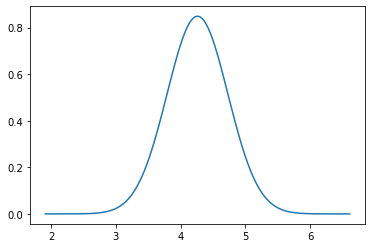

In [69]:
import math
from scipy.stats import norm
# https://vimsky.com/zh-tw/examples/detail/python-method-scipy.stats.norm.pdf.html

data_mean = data[data['class']=='Iris-versicolor'].mean(axis=0).get('petal length')
# print(data[data['class']=='Iris-versicolor'].mean(axis=0))
data_standard = data[data['class']=='Iris-versicolor'].var(axis=0).get('petal length')
data_standard = math.pow(data_standard, 0.5)
print("𝜇: %.6f"%data_mean)
print("𝜎: %.6f"%data_standard)

data_axis = np.arange(data_mean - 5*data_standard, data_mean + 5*data_standard, 0.001)
plt.plot(data_axis, norm.pdf(data_axis, data_mean, data_standard))
plt.show()